In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jaiahuja/skin-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/jaiahuja/skin-cancer-detection
License(s): CC0-1.0
skin-cancer-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-detection.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_height, image_width = 180,180
batch_size = 32

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)


Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

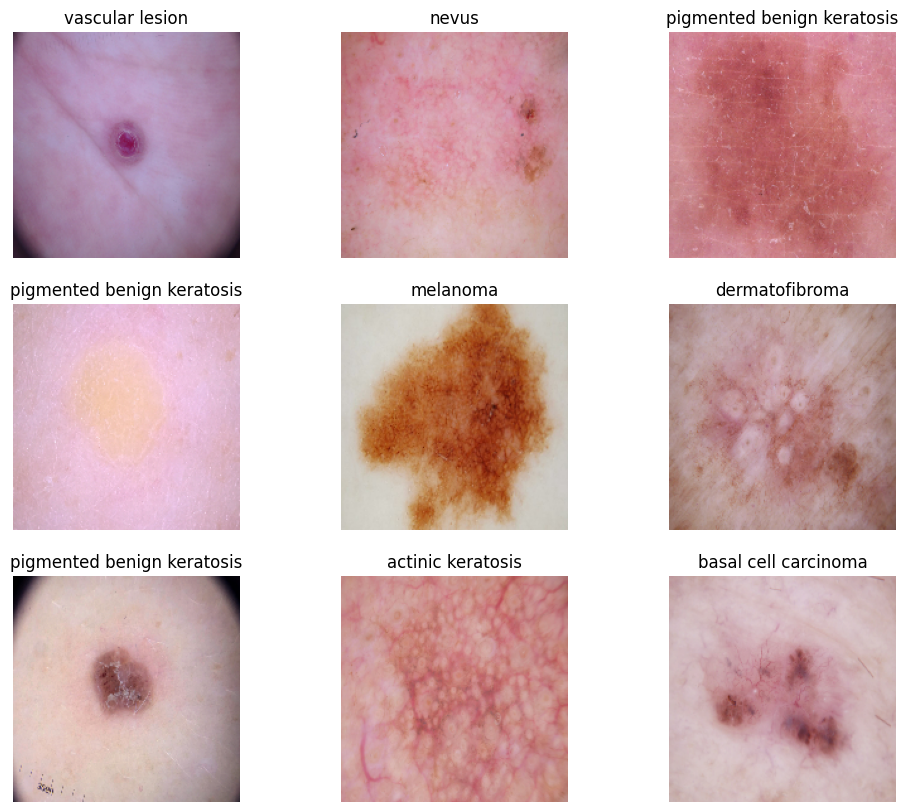

In [ ]:
#Visualize Image

plt.figure(figsize=(12,10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
num_classes = len(class_names)

In [ ]:

# CNN Model
from tensorflow.keras.layers import BatchNormalization , Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal

model = Sequential()

model.add(Input(shape=(image_height,image_width,3)))
model.add(Rescaling(1./255))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.03)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))
#model.add(MaxPooling2D())

#model.add(Conv2D(256, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.03)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))
#model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))




In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,2

 Total params: 3,053,641 (11.65 MB)

 Trainable params: 3,052,617 (11.64 MB)

 Non-trainable params: 1,024 (4.00 KB)

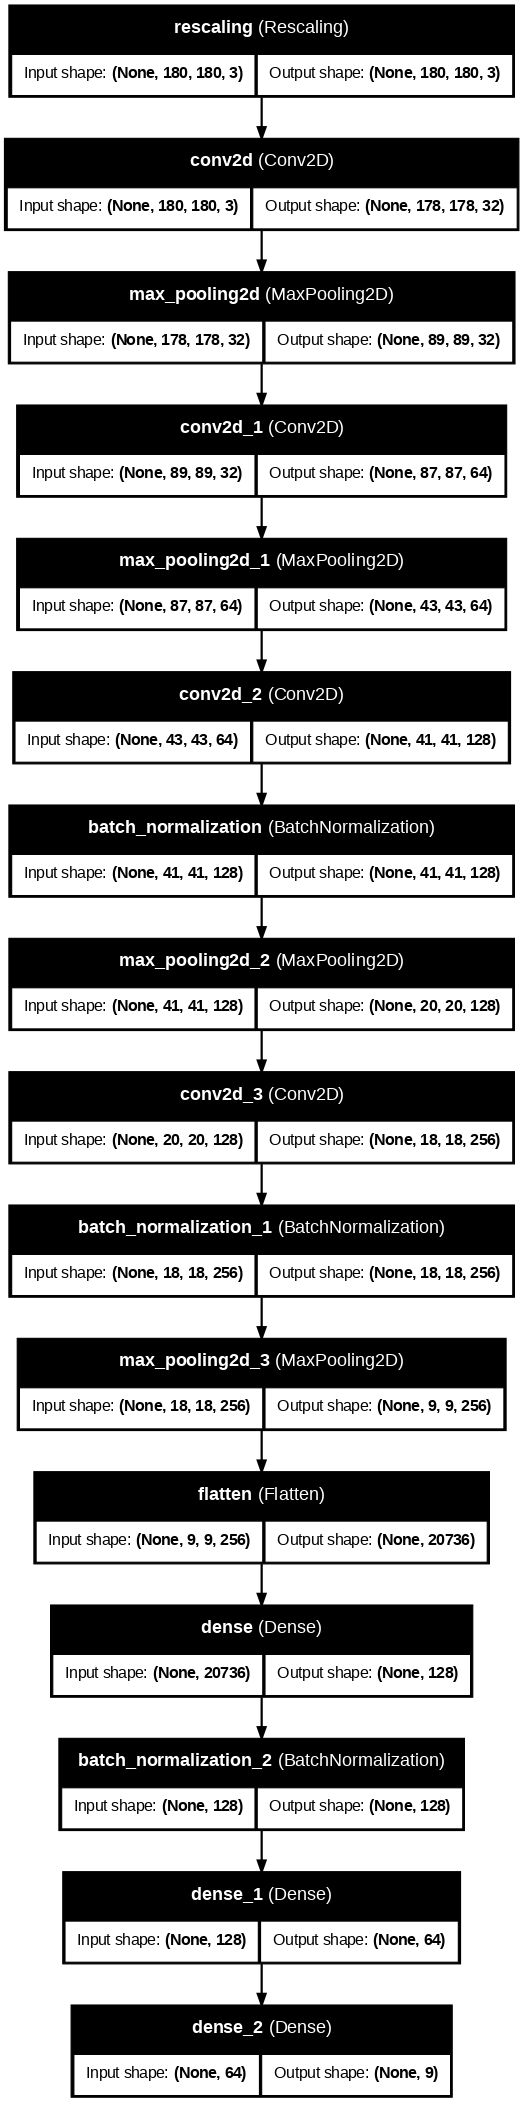

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 305ms/step - accuracy: 0.3593 - loss: 4.0335 - val_accuracy: 0.1477 - val_loss: 3.9677
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.4903 - loss: 3.1333 - val_accuracy: 0.1499 - val_loss: 3.8113
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.5612 - loss: 2.6929 - val_accuracy: 0.1521 - val_loss: 3.7226
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.5699 - loss: 2.4354 - val_accuracy: 0.1723 - val_loss: 3.2342
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.5909 - loss: 2.2361 - val_accuracy: 0.2908 - val_loss: 3.4968
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.5799 - loss: 2.0890 - val_accuracy: 0.2483 - val_loss: 3.1564
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.6340 - loss: 1.9478 - val_accuracy: 0.1924 - val_loss: 4.6466
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.6379 - loss: 1.8995 - val_accu

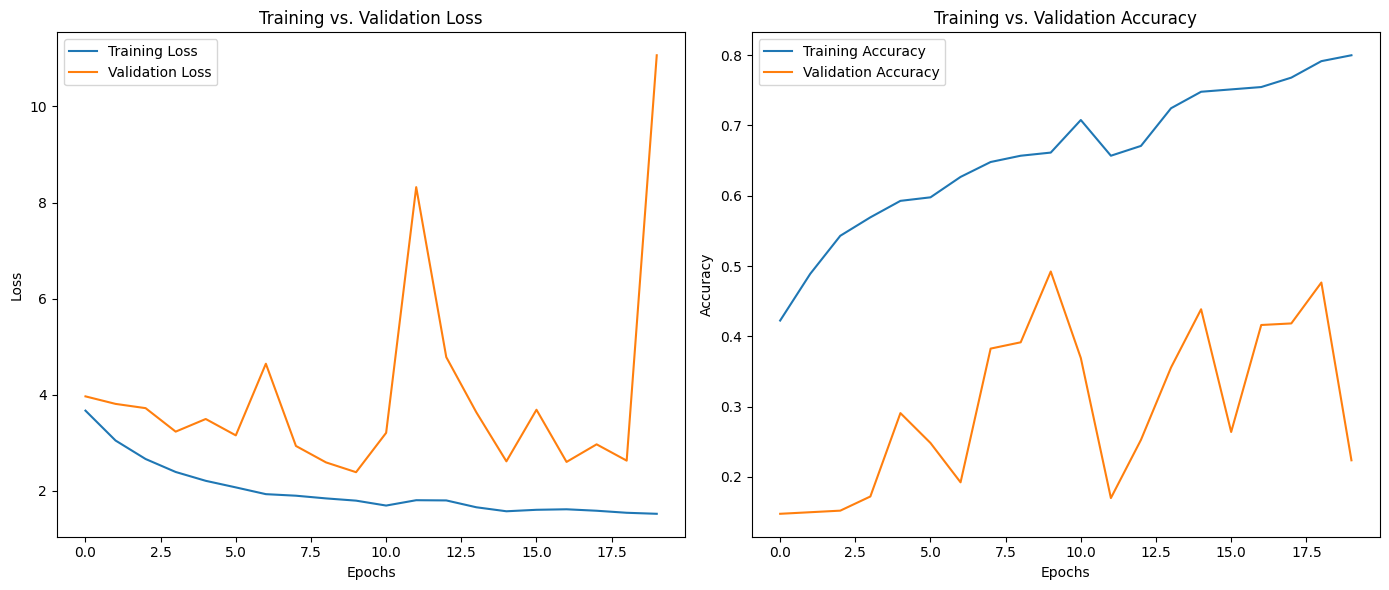

In [ ]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import os

In [ ]:
train_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
class_count = []
class_name = []
for dirpath, dirnames, filenames in os.walk(train_path):
    if dirpath == train_path:
        continue
    num_files = len(filenames)
    print(dirpath,num_files)
    class_count.append(num_files)
    class_name.append(os.path.basename(dirpath))


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus 357
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma 181
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion 139
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis 462
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis 114
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma 376
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma 438
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis 77
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma 95


In [ ]:
class_count

[357, 181, 139, 462, 114, 376, 438, 77, 95]

In [ ]:
class_name

['nevus',
 'squamous cell carcinoma',
 'vascular lesion',
 'pigmented benign keratosis',
 'actinic keratosis',
 'basal cell carcinoma',
 'melanoma',
 'seborrheic keratosis',
 'dermatofibroma']

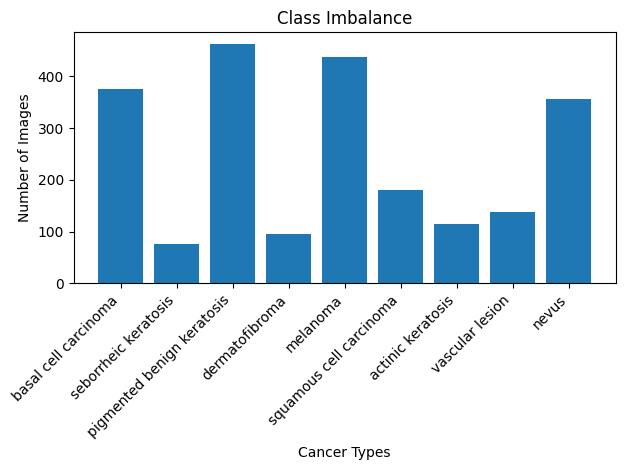

In [ ]:
# Visualize the Class Imbalance
plt.bar(class_name, class_count)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cancer Types')
plt.ylabel('Number of Images')
plt.title('Class Imbalance')
plt.tight_layout()
plt.show()

In [ ]:
target_count = 500

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=255
)

In [ ]:
for dirpath, dirnames, filenames in os.walk(train_path):
    if dirpath != train_path:
        image_files = [f for f in filenames if f.endswith(('.jpg', '.png', '.jpeg'))]
        image_count = len(image_files)

        if image_count < target_count:
            num_to_generate = target_count - image_count
            class_gen = datagen.flow_from_directory(
                directory=train_path,
                target_size=(image_height,image_width),
                batch_size=1,
                classes=[os.path.basename(dirpath)],
                save_to_dir=dirpath,
                save_prefix='aug',
                save_format='jpg'
            )

            for _ in range(num_to_generate):
                next(class_gen)




Found 357 images belonging to 1 classes.
Found 181 images belonging to 1 classes.
Found 139 images belonging to 1 classes.
Found 462 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
Found 376 images belonging to 1 classes.
Found 438 images belonging to 1 classes.
Found 77 images belonging to 1 classes.
Found 95 images belonging to 1 classes.


In [ ]:
#Generators
aug_train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)

aug_validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size = 32,
    image_size = (image_height, image_width)
)


Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history1 = model.fit(aug_train_ds, epochs=30, validation_data=aug_validation_ds, callbacks=[early_stopping])

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.2104 - loss: 17.5090 - val_accuracy: 0.1167 - val_loss: 8.9646
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.3854 - loss: 5.7725 - val_accuracy: 0.1144 - val_loss: 7.8162
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.3965 - loss: 3.7301 - val_accuracy: 0.1144 - val_loss: 4.5736
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.4006 - loss: 2.8397 - val_accuracy: 0.1167 - val_loss: 3.7841
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.4048 - loss: 2.5007 - val_accuracy: 0.2233 - val_loss: 2.9779
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.4067 - loss: 2.3595 - val_accuracy: 0.1667 - val_loss: 2.9852
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.4244 - loss: 2.2139 - val_accuracy: 0.2756 - val_loss: 2.5944
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.3968 - loss: 

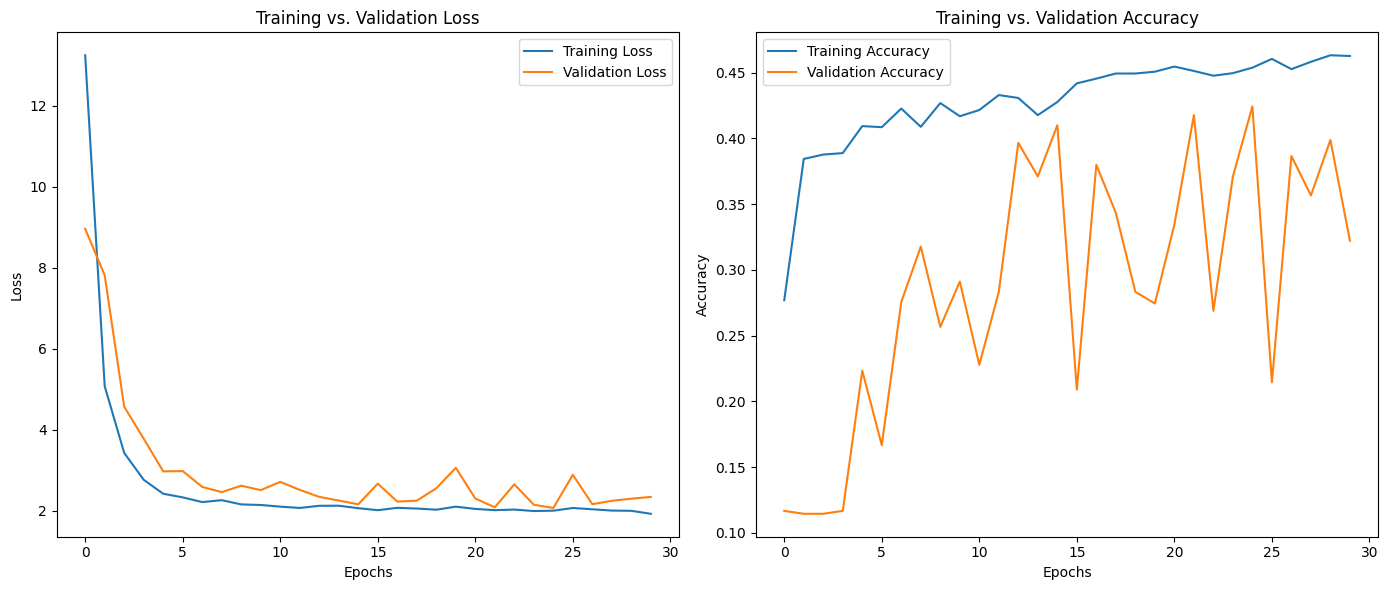

In [ ]:
# Extract loss values from the history object
aug_training_loss = history1.history['loss']
aug_validation_loss = history1.history['val_loss']

# Extract accuracy values from the history object
aug_training_accuracy = history1.history['accuracy']
aug_validation_accuracy = history1.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(aug_training_loss, label='Training Loss')
plt.plot(aug_validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(aug_training_accuracy, label='Training Accuracy')
plt.plot(aug_validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    batch_size = 1,
    image_size = (image_height, image_width)
)

Found 118 files belonging to 9 classes.


In [ ]:
test_pred = model.predict(test_ds)

118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


In [ ]:
from sklearn.metrics import accuracy_score

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_labels = np.argmax(test_pred, axis=1)

accuracy = accuracy_score(y_true , y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.14


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.23      0.31      0.26        16
           1       0.03      0.06      0.04        16
           2       0.00      0.00      0.00        16
           3       0.12      0.12      0.12        16
           4       0.20      0.25      0.22        16
           5       0.17      0.19      0.18        16
           6       0.00      0.00      0.00         3
           7       0.40      0.12      0.19        16
           8       0.00      0.00      0.00         3

    accuracy                           0.14       118
   macro avg       0.13      0.12      0.11       118
weighted avg       0.16      0.14      0.14       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. CNN Architecture:

Q) What layers did you choose in your CNN architecture and why?

I used 4 convolutional layers followed by max-pooling and dropout layers to extract key features while reducing overfitting. The convolutional layers
capture spatial hierarchies from the images, while pooling layers down-sample the feature maps to reduce computational cost. Dropout was used to
prevent overfitting. Lastly, fully connected dense layers were added for learning complex representations before classification.

Q) How does each layer (Convolutional, Pooling, Dense, etc.) contribute to the classification task?

Convolutional layers detect features like edges and textures from the input images. Pooling layers down-sample the feature maps, making the model
more efficient and invariant to small translations. Dense layers act as classifiers by combining the learned features, while the final output layer (with
softmax activation) predicts the different class. Dropout layers help regularize the model to prevent overfitting.


2. Model Training:

Q) How does data augmentation affect the performance of your CNN model?

Data augmentation increases the diversity of the training set by applying random transformations (like flipping, zooming, and shearing), which helps the
model generalize better to unseen data and prevents overfitting. As a result, the model learns more robust features and performs better on the test set.

Q) How did you tune hyperparameters (e.g., learning rate, number of filters, kernel size, etc.) for better performance?

I experimented with different numbers of filters (32, 64, 128) in the convolutional layers to capture more detailed features. The kernel size was set to
(3x3) as it’s a common size for detecting small patterns. I used the Adam optimizer with the default learning rate but monitored the validation loss,
employing early stopping to avoid overfitting and adjust other hyperparameters when necessary

3. Further Improvements:

-Modification 1: Use Transfer Learning

By using a pre-trained model like VGG16 or ResNet, we can leverage the learned features from large-scale datasets like ImageNet. These models have
already captured rich hierarchical features, which could significantly boost accuracy, especially when fine-tuned for the skin cancer detection task.

-Modification 2: Increase Model Depth with Additional Convolutional Layers

Adding more convolutional layers with different filter sizes could help the model learn more complex features. This can capture finer details from the
images, which could improve its ability to distinguish between different classes. However, this should be balanced with dropout layers to prevent overfitting